In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate as integrate

# Calculating $\sqrt2$

We desire to calculate $\sqrt2$ using Monte Carlo method. For this, we use a curve defined as $y = 2 - x^2$, with x $\in$ [0, $\sqrt2$] and y $\in$ [0, 2], inside a square with x and y $\in$ [0, 2].

We generate uniform points inside the square and get the fraction inside the curve. With this fraction, we can calculate the value of $\sqrt2$.


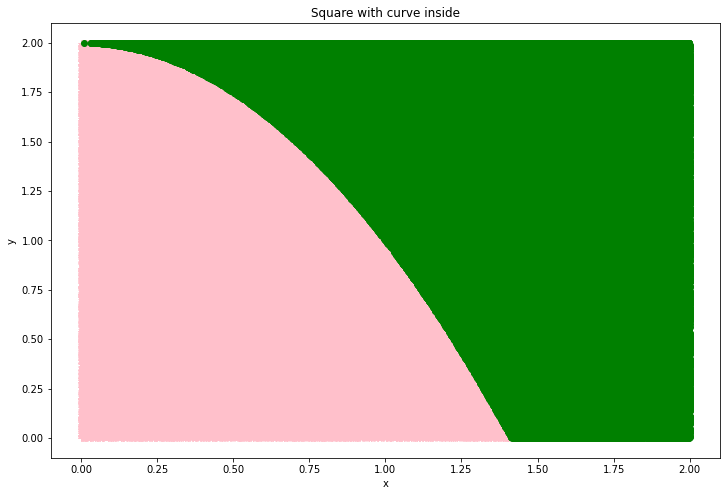

In [ ]:
#QUESTAO 1
def func_curve(x, y):
  '''
  This function tests with the point (x, y) is inside the curve
  '''
  return 2-x**2 - y >= 0

def generate_points(n):
  x = np.random.uniform(low=0, high=2, size=n)
  y = np.random.uniform(low=0, high=2, size=n)

  inside_curve_x = []
  inside_curve_y = []
  outside_curve_x = []
  outside_curve_y = []

  for i in range(0, n):
    if func_curve(x[i], y[i]):
      inside_curve_x.append(x[i])
      inside_curve_y.append(y[i])
    else:
      outside_curve_x.append(x[i])
      outside_curve_y.append(y[i])
  return inside_curve_x, inside_curve_y, outside_curve_x, outside_curve_y

def estimate_sqrt2(n):
  in_x, _, _, _ = generate_points(n)
  return 3*len(in_x)/n


in_x, in_y, out_x, out_y = generate_points(10**6)

plt.figure(figsize=(12,8))
plt.plot(in_x, in_y, "+", color='pink')
plt.plot(out_x, out_y, "bo", color='green')
plt.title("Square with curve inside")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

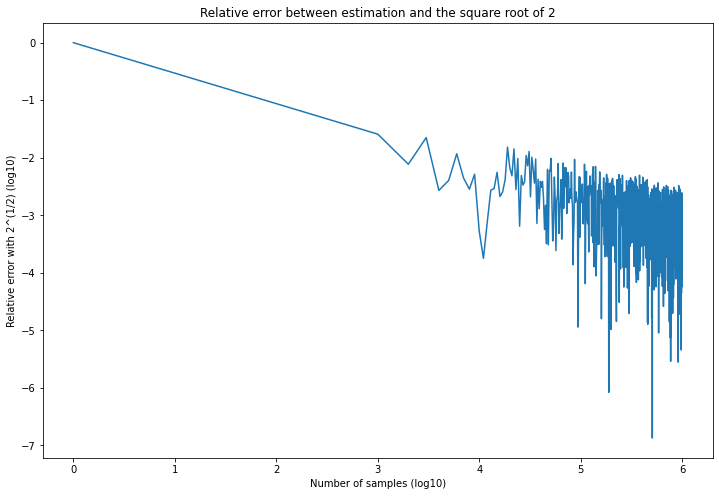

In [ ]:
#QUESTAO 1
n = np.arange(1, 10**6, 1000)
estimate_sqrt = []
for i in n:
  estimate_sqrt.append((abs(estimate_sqrt2(i)-np.sqrt(2)))/np.sqrt(2))

plt.figure(figsize=(12,8))
plt.plot(np.log10(n), np.log10(estimate_sqrt))
plt.title("Relative error between estimation and the square root of 2")
plt.xlabel("Number of samples (log10)")
plt.ylabel("Relative error with 2^(1/2) (log10)")
plt.show()


# Calculating distributions using inverse transform sampling

For distributions where we don't know to generate samples, we can use the inverse of their cdf. In this case, we calculate the inverse of the cdf; after, we generate samples uniformly, in the interval in which the function is defined and it is applied to the inverse function.


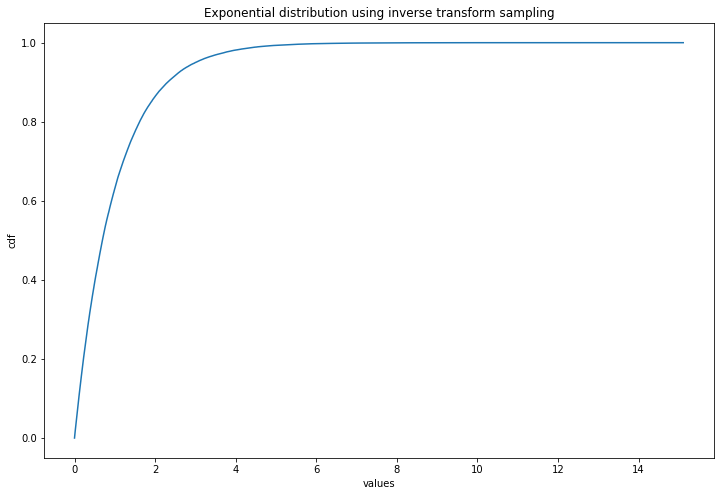

In [ ]:
#QUESTAO 2
def exponential_mc(alpha=1, n=100000):
  unif = np.random.uniform(size=n) 

  exp_values = -np.log(unif)/alpha

  p = 1. * np.arange(len(exp_values)) / (len(exp_values) - 1)
  data_sorted = np.sort(exp_values)

  plt.figure(figsize=(12,8))
  plt.plot(data_sorted, p)
  plt.title("Exponential distribution using inverse transform sampling")
  plt.xlabel("values")
  plt.ylabel("cdf")
  plt.show()


exponential_mc()


[3.95552067 4.53994634 4.66711626 ... 3.30315422 4.9433761  4.90700406]
[0.25281122 0.22026692 0.21426507 ... 0.30274094 0.2022909  0.20379033]


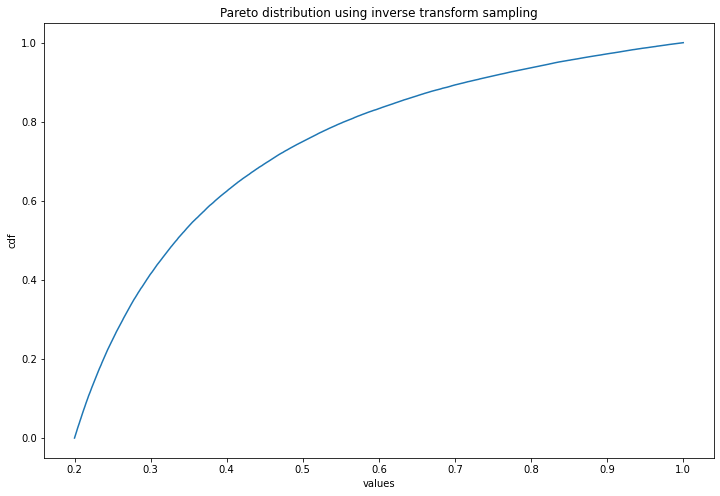

In [ ]:
#QUESTAO 2
def pareto_mc(x0=1, alpha=1, n=100000):
  unif = np.random.uniform(low=x0, high=5, size=n) 
  pareto_values = x0/np.power((unif), (1/alpha))
  p = 1. * np.arange(len(pareto_values)) / (len(pareto_values) - 1)
  data_sorted = np.sort(pareto_values)

  plt.figure(figsize=(12,8))
  plt.plot(data_sorted, p)
  plt.title("Pareto distribution using inverse transform sampling")
  plt.xlabel("values")
  plt.ylabel("cdf")
  plt.show()


pareto_mc()


# Couting Web domains

In this exercise, we are asked to count the web domain, ending in ufrj.br, with a size between 1 and k. 

For this, we generate uniformly the domains with size between 1 and k - the size is also chosen uniformly - and test if the domain exists or not. We get the fraction of existing domains in the total domains.

In [ ]:
#QUESTAO 3
import string
import requests
alfabeto = list(string.ascii_lowercase)

def generate_doms(n, k=4):
  doms = []
  for i in range(0, n):
    len_dom = np.random.randint(low=1, high=k+1, size=1)[0]
    index = np.random.randint(low=0, high=len(alfabeto), size=len_dom)
    doms.append("".join([alfabeto[j] for j in index]))
  return doms

def test_dom(name):
  try:
    request = requests.get('http://www.'+name+'.ufrj.br', verify=False)
  except requests.ConnectionError:
    return False
  if request.status_code == 200:
    return True

def count_valid_doms(n, k):
  doms = generate_doms(n, k)
  valid_doms = []
  invalid_doms = []
  for dom in doms:
    if test_dom(dom): valid_doms.append(dom)
    else: invalid_doms.append(dom)
  return valid_doms, invalid_doms

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

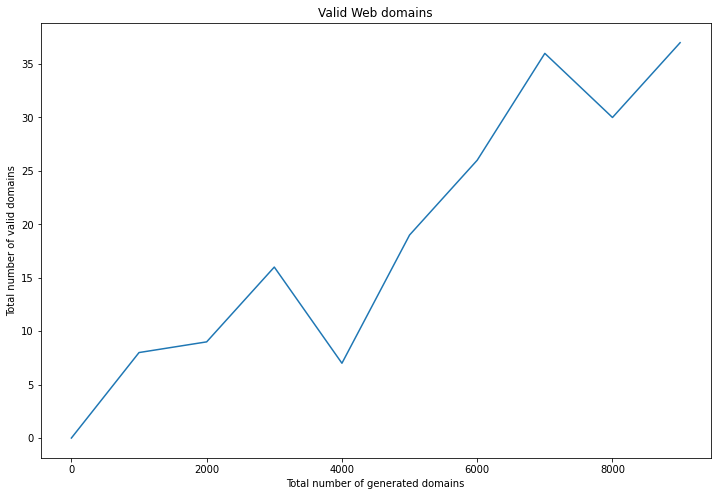

In [ ]:
#QUESTAO 3
n = np.arange(1, 10**4, 1000)
all_valid = []
for num_total in n:
  v, i = count_valid_doms(num_total, 4)
  all_valid.append(len(v))

plt.figure(figsize=(12,8))
plt.plot(n, all_valid)
plt.title("Valid Web domains")
plt.xlabel("Total number of generated domains")
plt.ylabel("Total number of valid domains")
plt.show()

# Generating samples from unkown distribution

We want to generate samples from Normal distribution, with mean 0 and variance equals to 1. For this, we are using the rejection sampling method, where we define an envelope function and generate points of this function. If the point is "inside" the objective function - here is the Normal - we accept; otherwise, we reject the point.

In [ ]:
#QUESTAO 4
from scipy.stats import norm, expon, uniform
def normal_pdf(x):
  return np.e**((-x**2)/2)/(np.sqrt(2*np.pi))

def generate_normal(n=10000):
  samples = []
  px_exponential = []
  for i in range(0, n):
    px = expon.rvs(size=1)
    unif = uniform.rvs(loc=0, scale=px, size=1)
    px_exponential.append(px[0])
    if unif <= normal_pdf(px[0]): samples.append(px[0])
  new_value = np.random.binomial(1, 0.5, len(samples))
  new_samples = []
  for i in range(0, len(samples)):
    if new_value[i] == 1: new_samples.append(-1*samples[i])
    else: new_samples.append(samples[i])
  new_exp = []
  new_value = np.random.binomial(1, 0.5, n)
  for i in range(0, n):
    if new_value[i] == 1: new_exp.append(-1*px_exponential[i])
    else: new_exp.append(px_exponential[i])
  return new_samples, new_exp


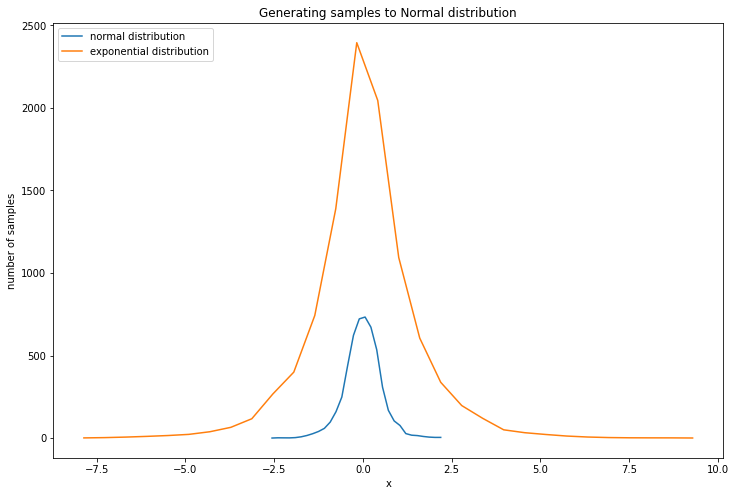

In [ ]:
#QUESTAO 4
from scipy.interpolate import UnivariateSpline
samples, exp_dist = generate_normal()
samples.sort()

plt.figure(figsize=(12,8))
p, x  = np.histogram(samples,bins=30)
x = x[:-1] + (x[1] - x[0])/2 
f = UnivariateSpline(x, p, s=30)
plt.plot(x, f(x), label="normal distribution")

p, x  = np.histogram(exp_dist,bins=30)
x = x[:-1] + (x[1] - x[0])/2 
f = UnivariateSpline(x, p, s=30)
plt.plot(x, f(x), label="exponential distribution")

plt.title("Generating samples to Normal distribution")
plt.xlabel("x")
plt.ylabel("number of samples")
plt.legend(loc="upper left")
plt.show()

# Estimating sums using importance sampling

When using importance sampling, we want estimate the sum $G_{n} = \sum_{i=1}^{N} i \times log(i)$. For this, we are using an auxiliar function $h(n) = \frac{i}{\sum_{i=1}^{N} i}$.

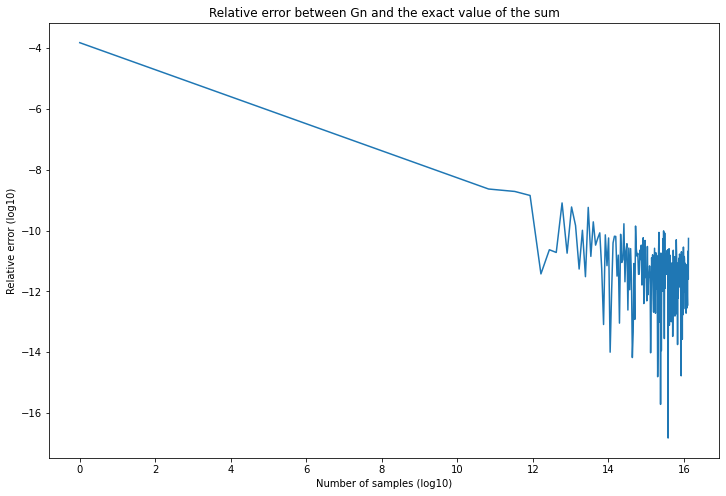

In [ ]:
#QUESTAO 5
def generate_probs():
  n = 10**6
  values = np.arange(1, n+1)
  ssum = (n*(n+1))/2
  return values/ssum


def func_h(x):
  n = 10**6
  ssum = (n*(n+1))/2
  return x/ssum


def func_g(x):
  return x*np.log(x)


def exact_value(n):
  ssum = 0
  for i in range(1, n+1):
    ssum += i*np.log(i)
  return ssum


def generate_gn(n, probs, values):
  S = 0
  samples = np.random.choice(values, size=n, p=probs)
  S+=sum(func_g(samples)/func_h(samples))
  return S/n

n = np.linspace(1, 10**7, 200, dtype=np.int32)
estimate_gn = []
probs = generate_probs()
values = np.arange(1, 10**6+1)
ex_value = exact_value(10**6)
for i in n:
  estimate_gn.append((abs(generate_gn(i, probs, values)-ex_value))/ex_value)

plt.figure(figsize=(12,8))
plt.plot(np.log(n),np.log(estimate_gn))
plt.title("Relative error between Gn and the exact value of the sum")
plt.xlabel("Number of samples (log10)")
plt.ylabel("Relative error (log10)")
plt.show()

# Integration using Monte Carlo

In [2]:
#QUESTAO 6
def integration_mc(alpha, a, b, n=100000):
	#between a and b
	unif = np.random.uniform(low=a, high=b, size=n)

	sum_func_exp = 0
	for var in unif:
		sum_func_exp += var**alpha

	expected_value = sum_func_exp/n

	func_value = expected_value*(b-a)

	return func_value

def calculate_func(x, alpha):
  return x**alpha

def calculate_integral(alpha, a, b):
  return integrate.quad(calculate_func, a, b, args=(alpha))[0]

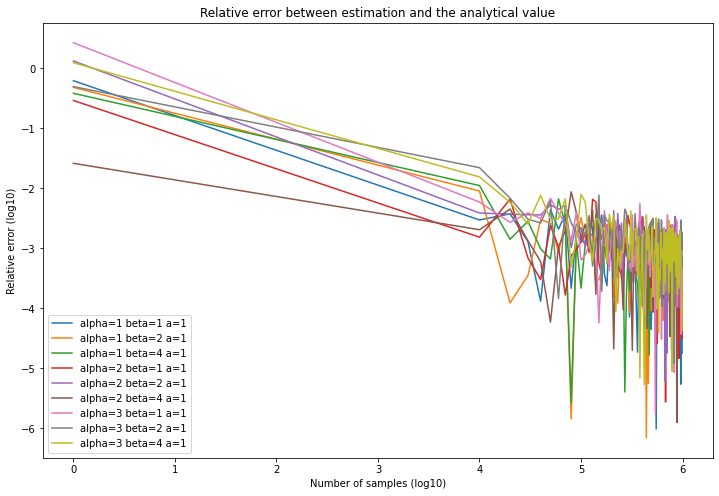

In [44]:
#QUESTAO 6
alphas = [1,2,3]
a = 0
bs = [1,2,4]
n = np.arange(1, 10**6, 10000)
all_errors = []

for alpha in alphas:
  for b in bs:
    errors = []
    g = calculate_integral(alpha, a, b)
    for i in n:
      g_hat = integration_mc(alpha, a, b, i)
      errors.append((abs(g_hat - g))/g)
    all_errors.append(errors)

plt.figure(figsize=(12,8))
for i in range(0, len(alphas)):
  for b in range(0, len(bs)):
    plt.plot(np.log10(n), np.log10(all_errors[3*i+b]), label='alpha='+str(alphas[i])+' beta='+str(bs[b])+' a=1')

plt.title("Relative error between estimation and the analytical value")
plt.xlabel("Number of samples (log10)")
plt.ylabel("Relative error (log10)")
plt.legend(loc="lower left")
plt.show()

# Generating subsets

In this exercise, we want to generate subsets with size equals to k from a set with size equals n. We do this using the Knuth Shuffle algorithm.

In [24]:
#QUESTAO 7
def generate_one_sample(V, n, k):
	# n = total number of objects
	# k = number of objects to be selected
  for i in range(0, k):
    index = np.random.randint(low=0, high=n-i, size=1)[0]
    V[index], V[n-i-1] = V[n-i-1], V[index]
  return V[n-k:len(V)]

def generate_many_samples(n, k, M):
  total_time = 0
  V = list(range(0, n))
  for i in range(0, M):
    start = time.time()
    generate_one_sample(V, n, k)
    total_time += time.time()-start
  return total_time/M

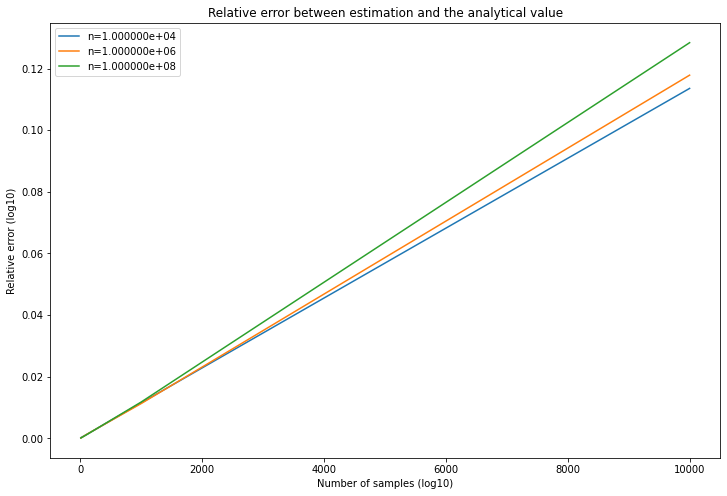

In [43]:
#QUESTAO 7
ttime = []
n = [10**4, 10**6, 10**8]
k = [10, 10**2, 10**3, 10**4]
for i in n:
  time_k = []
  for j in k:
    time_k.append(generate_many_samples(i, j, 10**3))
  ttime.append(time_k)

plt.figure(figsize=(12,8))
for i in range(0, len(n)):
    _label = f'{n[i]:e}'
    plt.plot(k, ttime[i], label="n=" + str(_label))
plt.title("Relative error between estimation and the analytical value")
plt.xlabel("Number of samples (log10)")
plt.ylabel("Relative error (log10)")
plt.legend(loc="upper left")
plt.show()